In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
caract=pd.read_csv("caract_2023.csv",sep=";")
caract=caract[["Num_Acc","mois","lum","dep","atm","com","agg","lat","long"]]
caract.isnull().any()
vehicules=pd.read_csv("vehicules_2023.csv",sep=";")
print('La base de données des véhicules comporte ',vehicules['occutc'].isnull().sum(),' valeurs manquantes ce qui représente ',100*vehicules['occutc'].isnull().sum()/len(vehicules),"% des observations de cette base")
vehicules=vehicules[["Num_Acc","id_vehicule","num_veh","catv","motor"]]
vehicules.isnull().any()
usagers=pd.read_csv("usagers_2023.csv",sep=";")
usagers=usagers[['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh','grav','place', 'sexe', 'an_nais','secu1', 'secu2', 'secu3']]
usagers.isnull().any()
n=usagers[("an_nais")].isnull().sum()
print('Il y a ',n*100/len(usagers),'% de valeurs manquantes')
usagers=usagers.dropna()

La base de données des véhicules comporte  92747  valeurs manquantes ce qui représente  99.10455735427686 % des observations de cette base
Il y a  2.0653634260547427 % de valeurs manquantes


In [3]:
#Fusion des trois bases
data = pd.merge(caract,usagers, on='Num_Acc', how='inner')
data=pd.merge(data,vehicules,on='id_vehicule',how="inner")
data=data.dropna()
data.isnull().any()
data.drop(columns=["num_veh_y","Num_Acc_y"])
duplicates = data.duplicated()

# Compter le nombre de doublons
num_duplicates = duplicates.sum()

# Afficher le nombre de doublons
print(f"Nombre de doublons dans la base data : {num_duplicates}")
#Calcul des ages
data["an_nais"]=2023-data["an_nais"]
data=data.rename({"an_nais":"age"},axis=1)
# Changement du type de la variable age en int
data['age']=data["age"].astype(int)
data

Nombre de doublons dans la base data : 0


,Num_Acc_x,mois,lum,dep,atm,com,agg,lat,long,id_usager,...,place,sexe,age,secu1,secu2,secu3,Num_Acc_y,num_veh_y,catv,motor
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100",203 851 184,...,1,1,45,2,0,-1,202300000001,A01,30,1
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 182,...,1,2,26,1,0,-1,202300000002,A01,7,1
2,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 183,...,10,1,26,0,-1,-1,202300000002,A01,7,1
3,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 180,...,1,1,36,2,6,0,202300000003,B01,2,1
4,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 181,...,1,2,39,1,0,0,202300000003,A01,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123186,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 720,...,1,1,52,2,0,-1,202300054821,A01,30,1
123187,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 721,...,1,2,55,1,0,-1,202300054821,B01,7,1
123188,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 717,...,2,2,20,1,-1,-1,202300054822,A01,7,1
123189,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 718,...,1,2,21,1,-1,-1,202300054822,A01,7,1


Nombre d'outliers supprimés avec IsolationForest : 1091


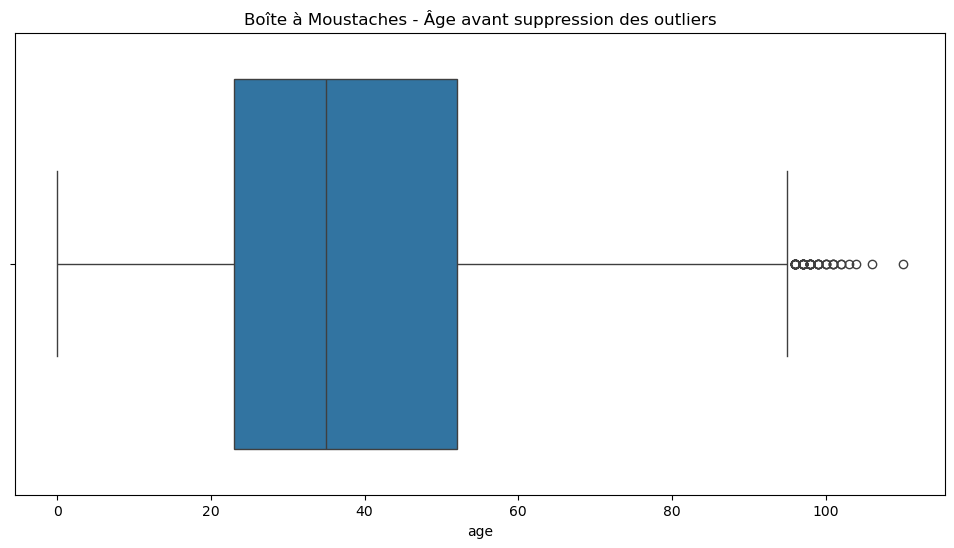

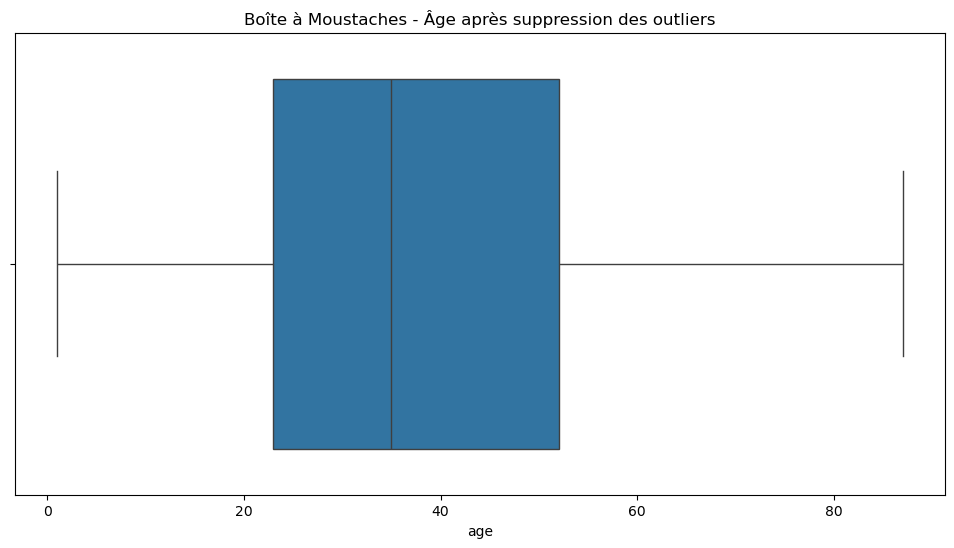

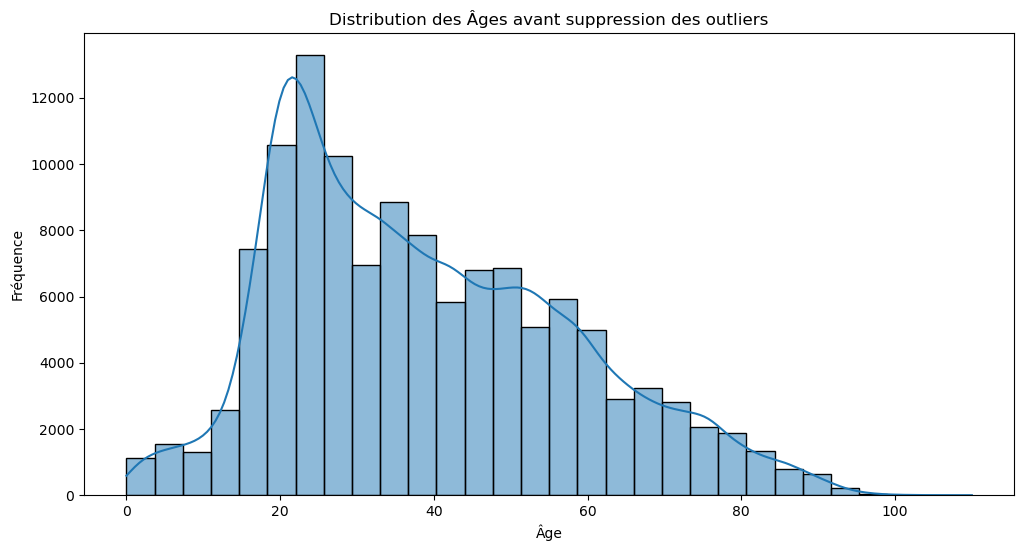

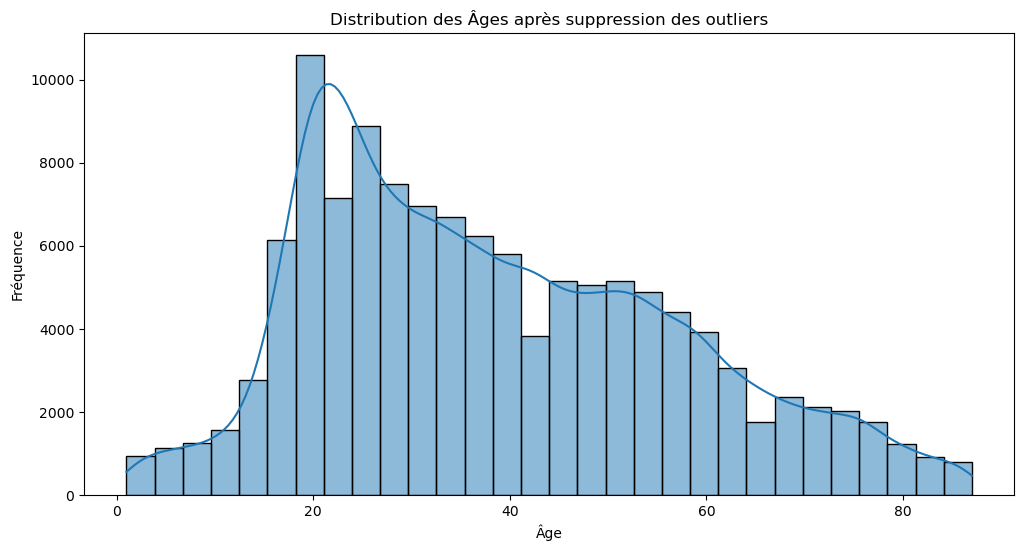

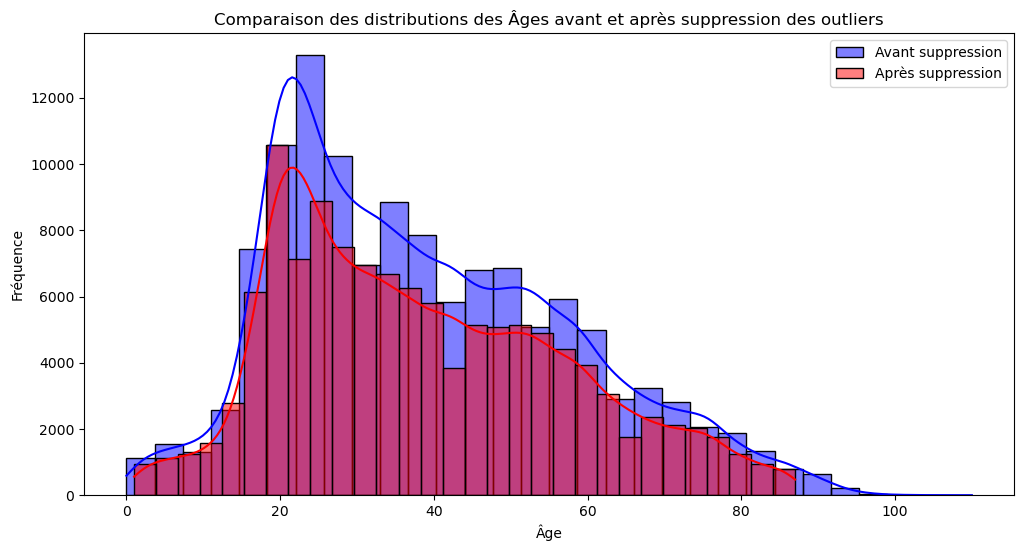

In [4]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# 1. Appliquer IsolationForest pour détecter les outliers dans la variable 'age'
model = IsolationForest(contamination=0.01)  # contamination = proportion d'outliers attendus
data['outlier'] = model.fit_predict(data[['age']])

# 2. 'outlier' va valoir 1 pour les données normales et -1 pour les outliers
# Supprimer les outliers
data_no_outliers_iforest = data[data['outlier'] == 1]

# 3. Afficher le nombre d'outliers supprimés
outliers_count = data.shape[0] - data_no_outliers_iforest.shape[0]
print(f"Nombre d'outliers supprimés avec IsolationForest : {outliers_count}")

# 4. Visualiser les données avec boîte à moustaches avant suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['age'])
plt.title("Boîte à Moustaches - Âge avant suppression des outliers")
plt.show()

# 5. Visualiser les données avec boîte à moustaches après suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_no_outliers_iforest['age'])
plt.title("Boîte à Moustaches - Âge après suppression des outliers")
plt.show()

# 6. Distribution (Histogramme) avant suppression des outliers
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title("Distribution des Âges avant suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# 7. Distribution (Histogramme) après suppression des outliers
plt.figure(figsize=(12, 6))
sns.histplot(data_no_outliers_iforest['age'], kde=True, bins=30)
plt.title("Distribution des Âges après suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# 8. Comparaison des distributions avant et après suppression des outliers
plt.figure(figsize=(12, 6))

# Avant suppression des outliers
sns.histplot(data['age'], kde=True, color='blue', label='Avant suppression', bins=30)

# Après suppression des outliers
sns.histplot(data_no_outliers_iforest['age'], kde=True, color='red', label='Après suppression', bins=30)

plt.title("Comparaison des distributions des Âges avant et après suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

data = data.drop(columns=['outlier'])

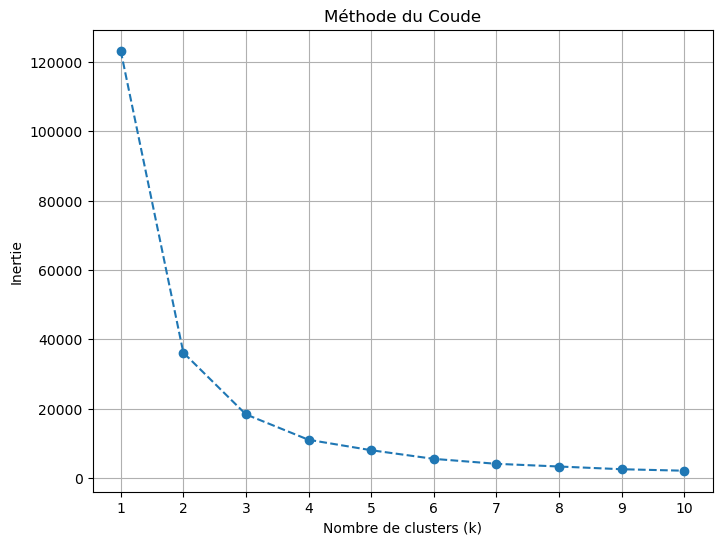

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Étape 2: Sélectionner la colonne 'age' pour appliquer le KMeans
age_data = data[["age"]]

# Étape 3: Normalisation de la variable 'age' (c'est souvent une bonne pratique pour KMeans)
scaler = StandardScaler()
age_data_scaled = scaler.fit_transform(age_data)

# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []  # Liste pour stocker les valeurs d'inertie

# Tester différentes valeurs de k (par exemple de 1 à 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(age_data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Exemple de chargement des données (assurez-vous que votre base "data" est déjà chargée)
# data = pd.read_csv("votre_fichier.csv")  # Remplacez par votre fichier réel

# On suppose que la variable 'age' est dans la base de données
age_data = data[['age']]

# Définir le nombre de clusters (à ajuster selon vos besoins)
n_clusters = 4

# Appliquer le K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(age_data)

# Ordonner les classes selon la moyenne des âges
cluster_order = (
    data.groupby('cluster')['age']
    .mean()
    .sort_values()
    .index
    .tolist()
)

# Mapper les clusters pour qu'ils soient ordonnés par âges croissants
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_order)}
data['age_class'] = data['cluster'].map(cluster_mapping)+1

# Supprimer l'ancienne colonne de cluster si non nécessaire
data = data.drop(columns=['cluster'])

# Calculer la distribution des observations par classe
distribution = data['age_class'].value_counts().sort_index()

# Afficher la distribution sous forme de tableau statistique

stat_summary = data.groupby('age_class')['age'].describe()

# Afficher le résumé statistique
print("Résumé statistique par classe :")
print(stat_summary)

KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"

In [7]:
#Suppression de la variable age
del data['age']
data

,Num_Acc_x,mois,lum,dep,atm,com,agg,lat,long,id_usager,...,place,sexe,secu1,secu2,secu3,Num_Acc_y,num_veh_y,catv,motor,age_class
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100",203 851 184,...,1,1,2,0,-1,202300000001,A01,30,1,2
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 182,...,1,2,1,0,-1,202300000002,A01,7,1,1
2,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 183,...,10,1,0,-1,-1,202300000002,A01,7,1,1
3,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 180,...,1,1,2,6,0,202300000003,B01,2,1,2
4,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 181,...,1,2,1,0,0,202300000003,A01,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123186,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 720,...,1,1,2,0,-1,202300054821,A01,30,1,3
123187,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 721,...,1,2,1,0,-1,202300054821,B01,7,1,3
123188,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 717,...,2,2,1,-1,-1,202300054822,A01,7,1,1
123189,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 718,...,1,2,1,-1,-1,202300054822,A01,7,1,1


2- STATISTIQUE DESCRIPTIVE
    2-1 Statistique descriptive univarié de quelques variables.

/tmp/ipykernel_1926/2921636290.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grav_stats.index, y=grav_stats.values, palette="coolwarm")


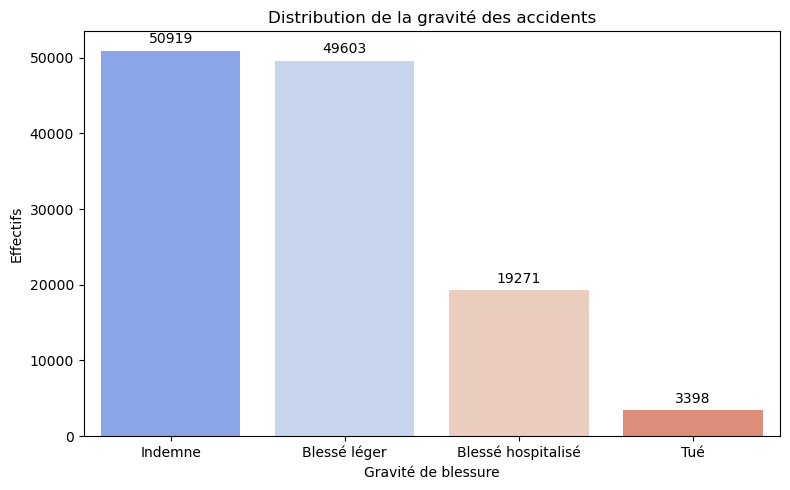

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que 'data' est votre DataFrame contenant la variable 'grav'.

# Ajout des labels pour la gravité
grav_labels = {
    1: "Indemne",
    2: "Tué",
    3: "Blessé hospitalisé",
    4: "Blessé léger"
}

# Remplacer les valeurs numériques par leurs labels
data['grav_label'] = data['grav'].map(grav_labels)

# Calcul des effectifs pour la variable 'grav_label'
grav_stats = data['grav_label'].value_counts()

# Diagramme en barres avec les labels
plt.figure(figsize=(8, 5))
sns.barplot(x=grav_stats.index, y=grav_stats.values, palette="coolwarm")
plt.title("Distribution de la gravité des accidents")
plt.xlabel("Gravité de blessure")
plt.ylabel("Effectifs")

# Ajouter les effectifs au-dessus des barres
for i, val in enumerate(grav_stats.values):
    plt.text(i, val + 0.02 * max(grav_stats.values), str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


On remarque de ce graphique présentant la distribution de la gravité des accidents en France en 2023 que, la majorité des individus impliqué dans un accidents s'en sortent indemme (50919) ou avec une légère blessure (49603). Une petite portion (3398) perdent la vie suivie d'un nombre non négligeable de personne hospitalisé. Cela voudrait dire que des mesures de sécurité sont prise et respecté par les usagers en majorité et ce qui atténue la gravité. On en déduit que ceux qui sont impliqués dans les accidents en France n'ont pas une grande gravité.

/tmp/ipykernel_1926/2921580217.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=secu1_label_counts.index, y=secu1_label_counts.values, palette="viridis")


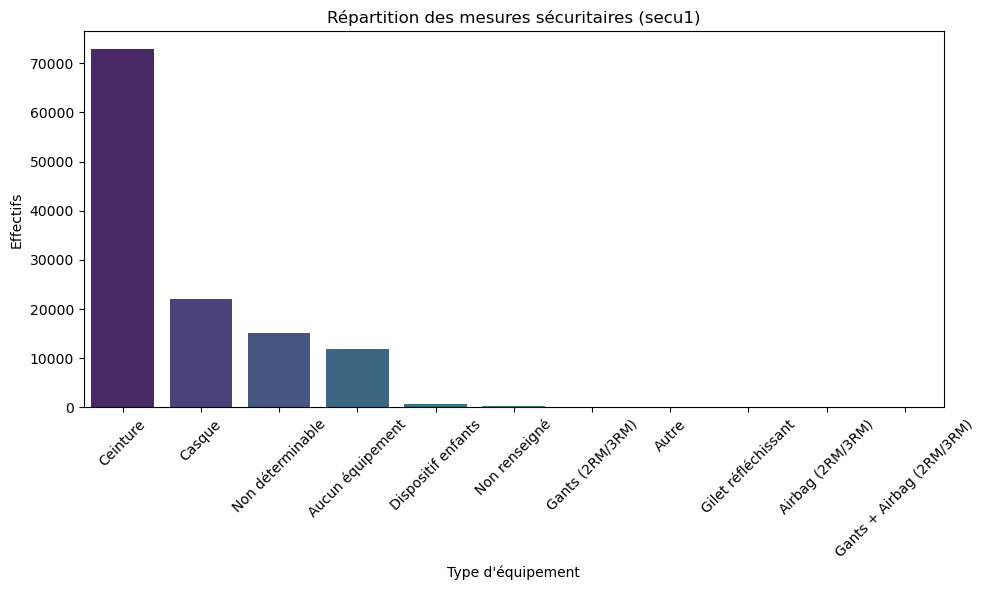

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création du dictionnaire des labels pour les mesures sécuritaires
secu_labels = {
    -1: "Non renseigné",
    0: "Aucun équipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet réfléchissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non déterminable",
    9: "Autre"
}

# Labellisation de la gravité
grav_labels = {
    1: "Indemne",
    2: "Tué",
    3: "Blessé hospitalisé",
    4: "Blessé léger"
}

# Appliquer les labels aux colonnes des mesures sécuritaires
data['secu1_label'] = data['secu1'].map(secu_labels)
data['secu2_label'] = data['secu2'].map(secu_labels)
data['secu3_label'] = data['secu3'].map(secu_labels)
data['grav_label'] = data['grav'].map(grav_labels)

# 1. Répartition des équipements sécuritaires (secu1)
secu1_label_counts = data['secu1_label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=secu1_label_counts.index, y=secu1_label_counts.values, palette="viridis")
plt.title("Répartition des mesures sécuritaires (secu1)")
plt.xlabel("Type d'équipement")
plt.ylabel("Effectifs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Le diagramme ci-dessus présente la repartition des mesures sécuritaires prise par les usagers en France. On remarque que la mesure de sécurité la plus observée est le port de ceinture de sécurité. Certains usagers ont des casques également lors d'un accident. Les autres mesures sont en de très faible proportions voir n'existent pas. On en déduit que sur un lieu d'accident, les concernés ont leurs casques en majorité et cela atténue les risques liés a la gravité.

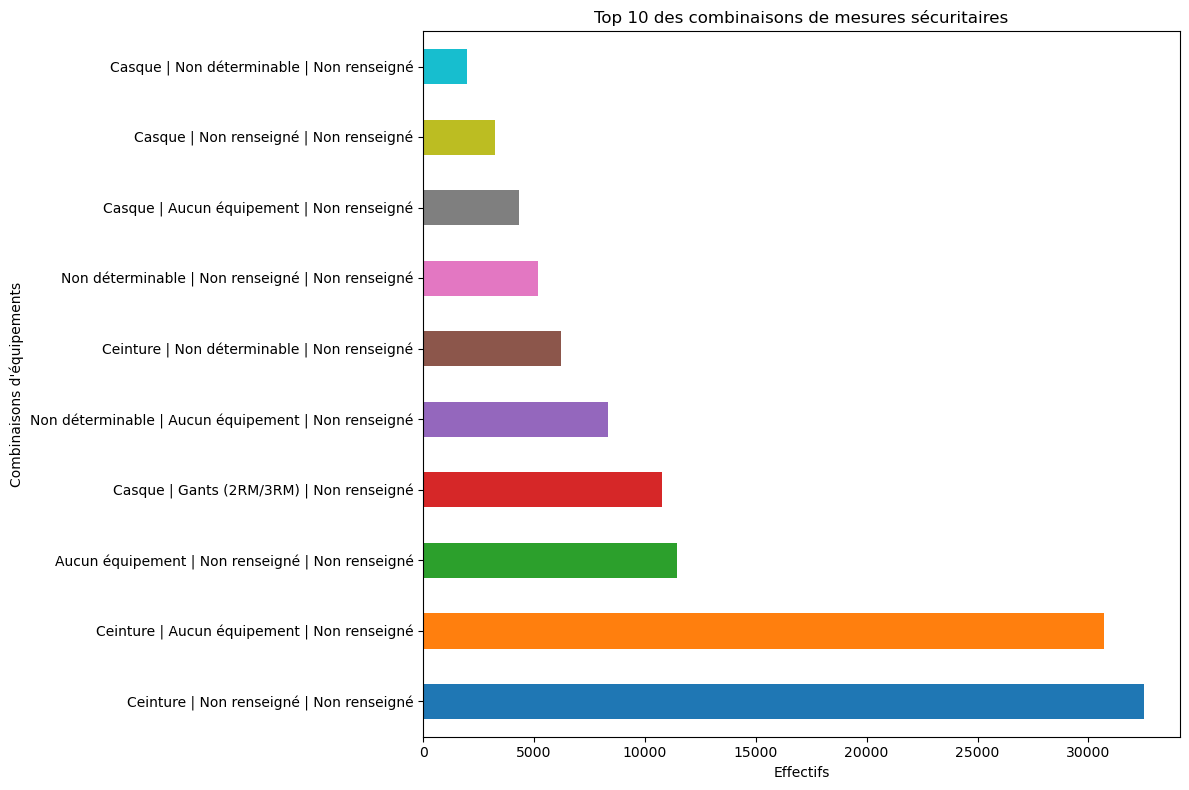

In [52]:

# 3. Combinaisons des mesures sécuritaires (Top 10) avec des couleurs diversifiées
data['secu_combined_label'] = data['secu1_label'] + " | " + data['secu2_label'] + " | " + data['secu3_label']
secu_comb_stats = data['secu_combined_label'].value_counts().head(10)

plt.figure(figsize=(12, 8))
secu_comb_stats.plot(
    kind='barh', 
    color=sns.color_palette("tab10", len(secu_comb_stats))
)
plt.title("Top 10 des combinaisons de mesures sécuritaires")
plt.xlabel("Effectifs")
plt.ylabel("Combinaisons d'équipements")
plt.tight_layout()
plt.show()

En combinant les trois mesures de sécurités, on remarque comme dans le cas précédent que la ceinture de sécurité est le plus utilisées. Le port de casque est en de très faible proportion malgré la combinaison des trois mesures de sécurité. La mesure de sécurité réduisant la gravité des accidents est le port de ceinture de sécurité chez les individus impliqués dans les accidents en 2023.


Statistiques descriptives pour 'lum':
      Effectif  Pourcentage (%)
lum                           
 1      81576        66.219123
 5      18645        15.135034
 3      13584        11.026780
 2       7989         6.485052
 4       1394         1.131576
-1          3         0.002435


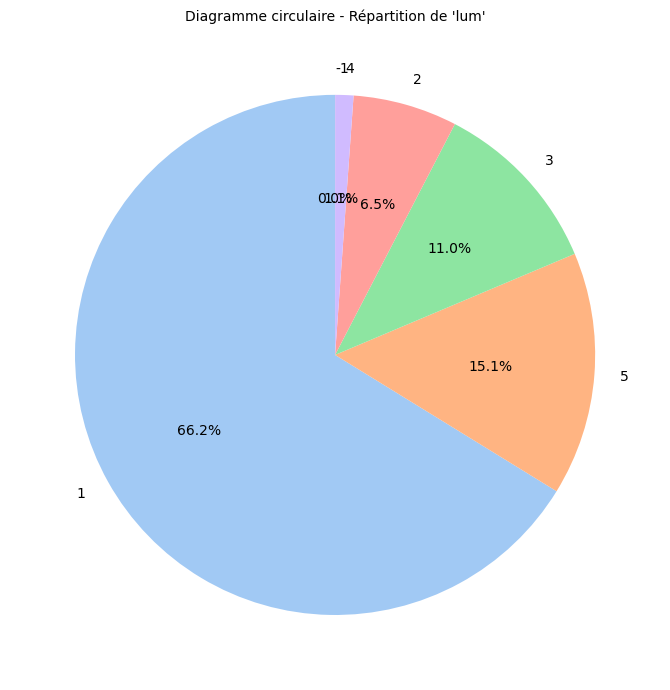

In [23]:
# Statistiques descriptives pour la variable 'lum'
stats_lum = data['lum'].value_counts()
percentages_lum = data['lum'].value_counts(normalize=True) * 100
summary_lum = pd.DataFrame({'Effectif': stats_lum, 'Pourcentage (%)': percentages_lum})
print(f"\nStatistiques descriptives pour 'lum':\n", summary_lum.head(10))

# Diagramme circulaire (Pie chart)
plt.figure(figsize=(7, 7))
stats_lum.plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"), labels=stats_lum.index, startangle=90)
plt.title("Diagramme circulaire - Répartition de 'lum'", fontsize=10)
plt.ylabel("")  # Supprimer l'étiquette
plt.tight_layout()
plt.show()


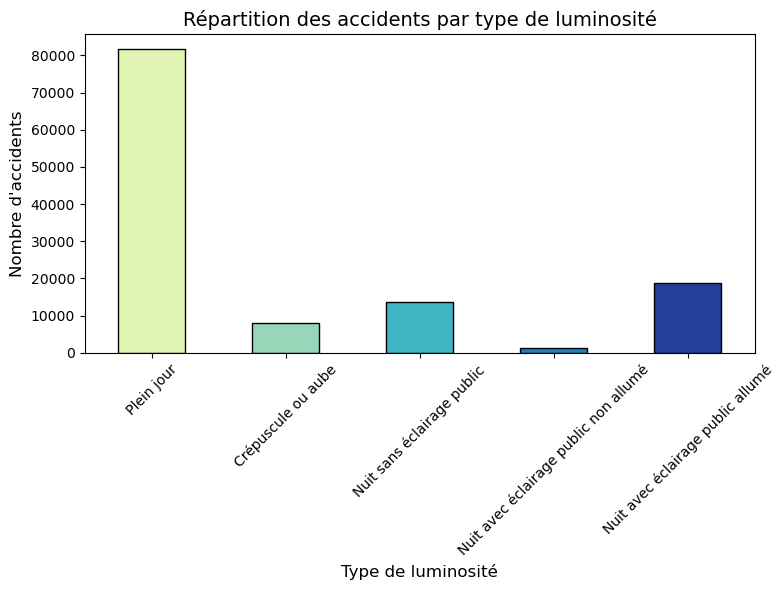

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionnaire des labels pour la variable 'lum'
lum_labels = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé"
}

# Ajout des labels à une nouvelle colonne pour plus de clarté
data['lum_label'] = data['lum'].map(lum_labels)

# Tri des données pour avoir une gradation logique selon les clés des labels
lum_counts = data['lum_label'].value_counts().reindex(lum_labels.values())

# Création d'une palette de couleurs graduées
colors = sns.color_palette("YlGnBu", len(lum_counts))  # Palette graduée de clair à sombre

# Tracé du graphique
plt.figure(figsize=(8, 6))
lum_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title("Répartition des accidents par type de luminosité", fontsize=14)
plt.xlabel("Type de luminosité", fontsize=12)
plt.ylabel("Nombre d'accidents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ce diagramme présente la repartition de la luminosité observée sur les lieux d'accidents. 66.2% des accidents ont eu lieu en plein jour. Seulement 15.1% des accidents ont lieu dans la nuit avec un eclairage public allumé. Contrairement à ce qu'on aurait pensé, les accidents ont lieu en majorité dans la journée en raison de la mobilité de la population dans la journée.Elle implique ainsi plusieurs personnes et donc eventuellement avoir des dommages graves.


Statistiques descriptives pour 'dep':
      Effectif  Pourcentage (%)
dep                           
75       9937         8.066336
93       5945         4.825840
92       5451         4.424836
94       4981         4.043315
13       4968         4.032762
..        ...              ...
70        244         0.198066
55        237         0.192384
36        235         0.190761
08        210         0.170467
48        132         0.107151

[101 rows x 2 columns]


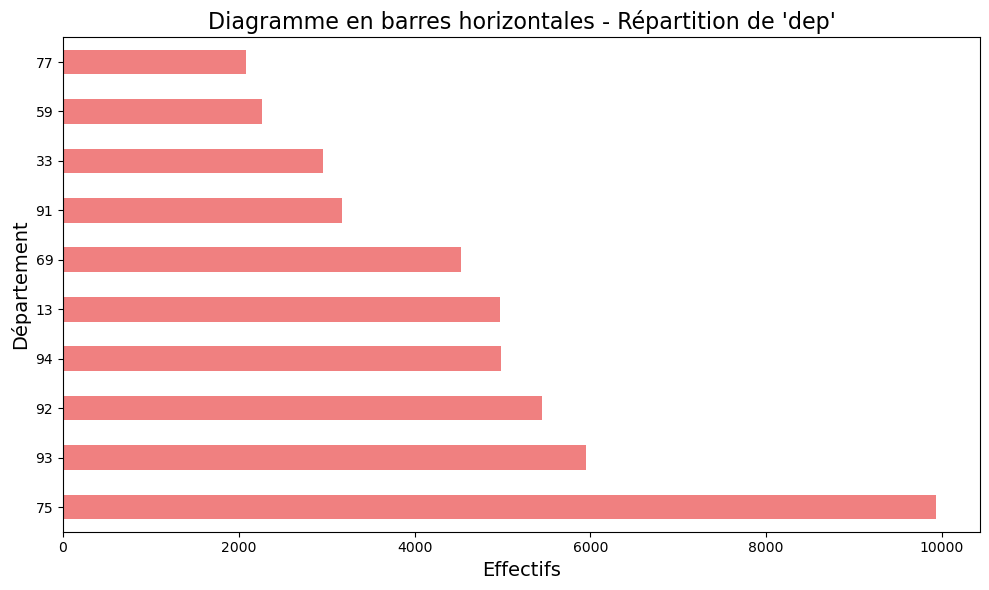

In [54]:
# Statistiques descriptives pour la variable 'dep'
stats_dep = data['dep'].value_counts()
percentages_dep = data['dep'].value_counts(normalize=True) * 100
summary_dep = pd.DataFrame({'Effectif': stats_dep, 'Pourcentage (%)': percentages_dep})
print(f"\nStatistiques descriptives pour 'dep':\n", summary_dep.head(101))

# Diagramme en barres horizontales
plt.figure(figsize=(10, 6))
stats_dep.head(10).plot(kind="barh", color="lightcoral")
plt.title("Diagramme en barres horizontales - Répartition de 'dep'", fontsize=16)
plt.xlabel("Effectifs", fontsize=14)
plt.ylabel("Département", fontsize=14)
plt.tight_layout()
plt.show()


Ce diagramme présente la distribution des 10 departements avec le plus grand nombre de risque d'avoir un accident. On constate que de la majorité des accidents au lieu à Paris. Les departements 92 (Hauts-de-Sein), 93 (Seine-Saint-Denis), 94 (Val-de-Marne) sont ceux qui suivent ayant plus de 4% enregistrer chez eux. Seulement 0.10% des accidents sont enregistrés à Lozère (48). La plupart des accidents ont eu lieu dans des zones avec une forte densité et aussi de deplacement.


Statistiques descriptives pour 'com':
        Effectif  Pourcentage (%)
com                             
75116      1090         0.884805
97302       961         0.780089
75112       815         0.661574
75117       802         0.651022
75119       719         0.583647
75114       702         0.569847
97411       693         0.562541
35238       693         0.562541
75120       692         0.561729
75115       686         0.556859


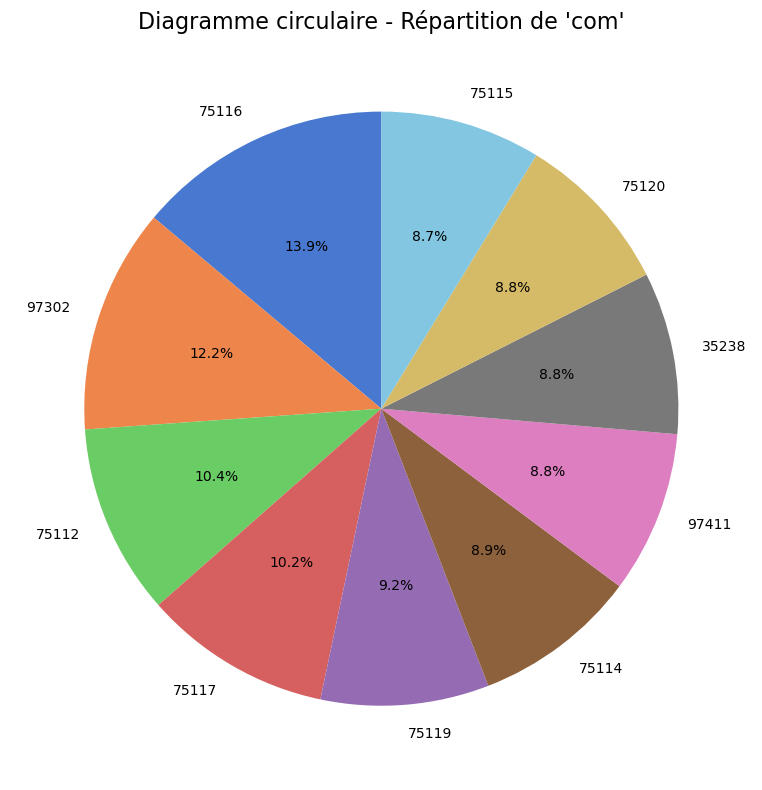

In [26]:
# Statistiques descriptives pour la variable 'com'
stats_com = data['com'].value_counts()
percentages_com = data['com'].value_counts(normalize=True) * 100
summary_com = pd.DataFrame({'Effectif': stats_com, 'Pourcentage (%)': percentages_com})
print(f"\nStatistiques descriptives pour 'com':\n", summary_com.head(10))

# Diagramme circulaire (Pie chart)
plt.figure(figsize=(8, 8))
stats_com.head(10).plot.pie(autopct="%1.1f%%", colors=sns.color_palette("muted"), labels=stats_com.index, startangle=90)
plt.title("Diagramme circulaire - Répartition de 'com'", fontsize=16)
plt.ylabel("")  # Supprimer l'étiquette
plt.tight_layout()
plt.show()


D'après le diagramme ci-dessus présentant les 10 communes ou le nombre d'accidents enregistrés sont les plus élevés en France en 2023. On remarque que comme dans le cas des departements, le plus grands nombre d'accident est observé dans une commune de Paris (75116). Parmi ces 10 communes, plus de la moitié sont de Paris. L'affluence, la densité de la population sans oublié la mobilité des personnes et les administrations situé à Paris sont principalement les raisons de ces grands nombres d'accidents.


Statistiques descriptives pour 'agg':
      Effectif  Pourcentage (%)
agg                           
2       74024        60.088805
1       49167        39.911195


/tmp/ipykernel_1926/2223139049.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_agg.index, y=stats_agg.values, palette=colors)  # Utilisation d'une palette colorée


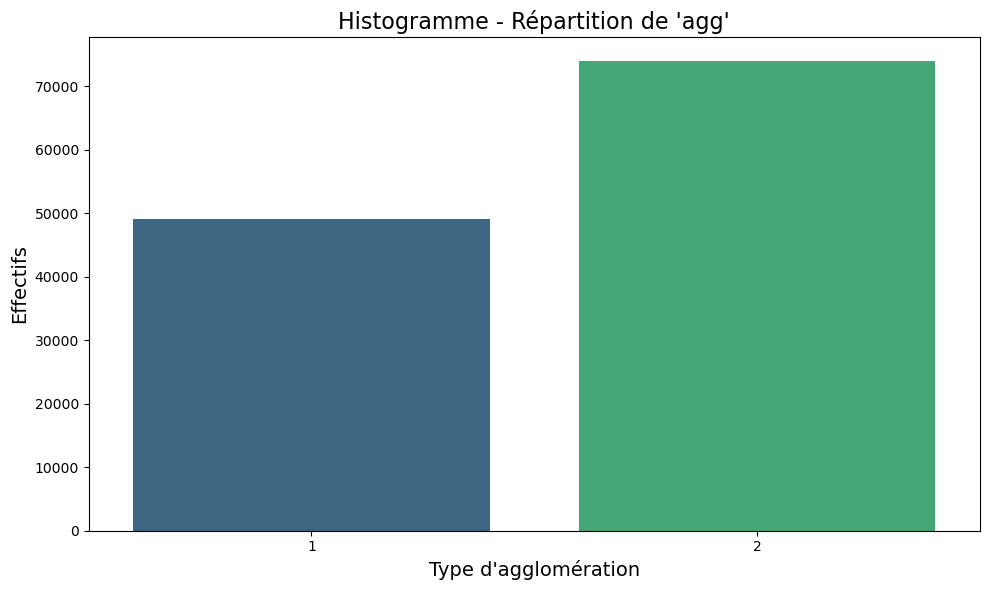

In [56]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Statistiques descriptives pour la variable 'agg'
stats_agg = data['agg'].value_counts()
percentages_agg = data['agg'].value_counts(normalize=True) * 100
summary_agg = pd.DataFrame({'Effectif': stats_agg, 'Pourcentage (%)': percentages_agg})
print(f"\nStatistiques descriptives pour 'agg':\n", summary_agg.head(10))

# Création d'une palette de couleurs
colors = sns.color_palette("viridis", len(stats_agg))

# Histogramme avec des couleurs différentes pour chaque barre
plt.figure(figsize=(10, 6))
sns.barplot(x=stats_agg.index, y=stats_agg.values, palette=colors)  # Utilisation d'une palette colorée
plt.title("Histogramme - Répartition de 'agg'", fontsize=16)
plt.xlabel("Type d'agglomération", fontsize=14)
plt.ylabel("Effectifs", fontsize=14)
plt.tight_layout()
plt.show()


L'histogramme présente la repartition des accidents selon le type d'agglomération. On observe que la majorité des accidents ont lieu dans des zones a forte densité et donc avec une agglomération.


Statistiques descriptives pour 'sexe':
       Effectif  Pourcentage (%)
sexe                           
 1       83847        68.062602
 2       39335        31.930092
-1           9         0.007306


/tmp/ipykernel_1926/2680467125.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sexe', order=stats_sexe.index, palette="viridis")


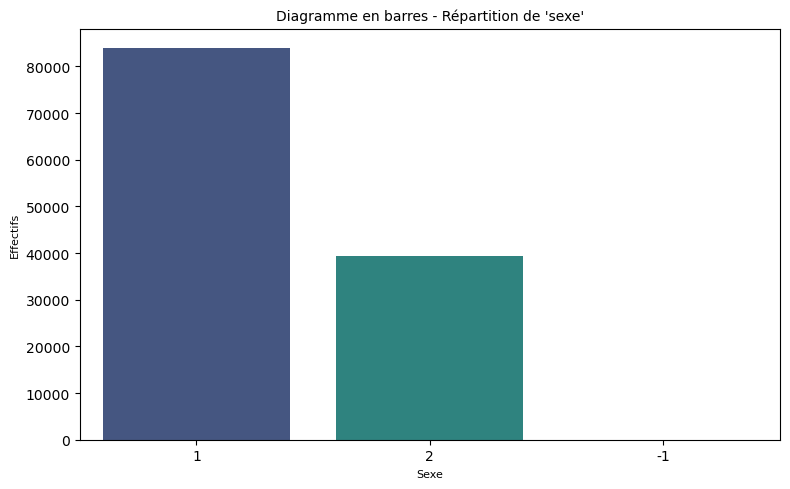

In [35]:
# Statistiques descriptives pour la variable 'sexe'
stats_sexe = data['sexe'].value_counts()
percentages_sexe = data['sexe'].value_counts(normalize=True) * 100
summary_sexe = pd.DataFrame({'Effectif': stats_sexe, 'Pourcentage (%)': percentages_sexe})
print(f"\nStatistiques descriptives pour 'sexe':\n", summary_sexe.head(10))

# Diagramme en barres
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sexe', order=stats_sexe.index, palette="viridis")
plt.title("Diagramme en barres - Répartition de 'sexe'", fontsize=10)
plt.xlabel("Sexe", fontsize=8)
plt.ylabel("Effectifs", fontsize=8)
plt.tight_layout()
plt.show()


Ce graphique présente la repartition du sexe en France sur les lieux d'accidents. On remarque que les personnes de sexe masculin sont plus impliqué dans des accidents que les personnes de sexe féminin. 


Statistiques descriptives pour 'age_class':
            Effectif  Pourcentage (%)
age_class                           
1             45618        37.030303
2             35430        28.760218
3             28238        22.922129
4             13905        11.287351


/tmp/ipykernel_1926/2721546481.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_age_class.index, y=stats_age_class.values, palette=colors)  # Utilisation de couleurs différentes


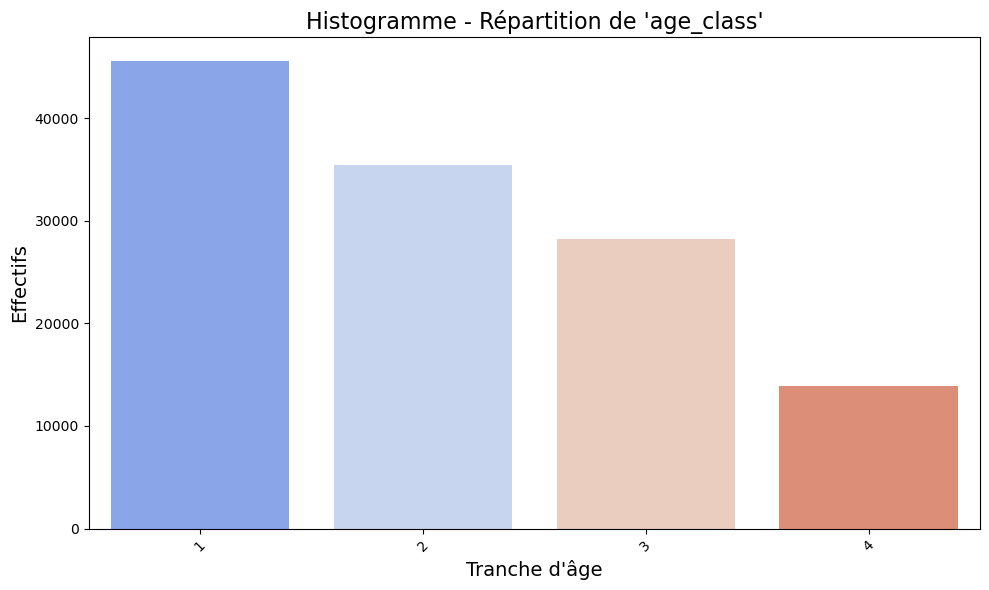

In [57]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Statistiques descriptives pour la variable 'age_class'
stats_age_class = data['age_class'].value_counts()
percentages_age_class = data['age_class'].value_counts(normalize=True) * 100
summary_age_class = pd.DataFrame({'Effectif': stats_age_class, 'Pourcentage (%)': percentages_age_class})
print(f"\nStatistiques descriptives pour 'age_class':\n", summary_age_class.head(10))

# Création d'une palette de couleurs
colors = sns.color_palette("coolwarm", len(stats_age_class))

# Histogramme avec des couleurs différentes pour chaque barre
plt.figure(figsize=(10, 6))
sns.barplot(x=stats_age_class.index, y=stats_age_class.values, palette=colors)  # Utilisation de couleurs différentes
plt.title("Histogramme - Répartition de 'age_class'", fontsize=16)
plt.xlabel("Tranche d'âge", fontsize=14)
plt.ylabel("Effectifs", fontsize=14)
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité
plt.tight_layout()
plt.show()


De l'histogramme présentant la répartition des ages suivant les classes, on constate que les jeunes sont plus impliqués dans les accidents. En raison de la mobilité et des facultés dont ils disposent pour se déplacer contrairement à des personnes des derniers classes ayant des âges supérieur à 45 ans. On en déduit que les jeunes de moins de 45 ans sont plus impliqués dans les accidents.

In [12]:
############################################
################# 2-STAT DESC BIVARIE ################

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd  # Pour des cartes géographiques


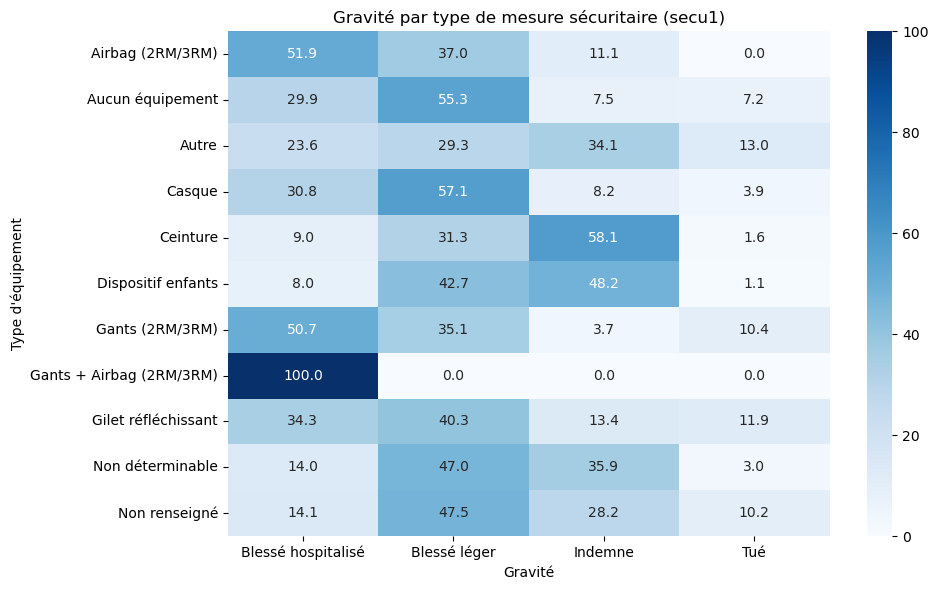

In [45]:
# 2. Gravité par type de mesure sécuritaire (secu1)
crosstab_secu1_grav = pd.crosstab(data['secu1_label'], data['grav_label'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_secu1_grav, annot=True, cmap="Blues", fmt=".1f")
plt.title("Gravité par type de mesure sécuritaire (secu1)")
plt.xlabel("Gravité")
plt.ylabel("Type d'équipement")
plt.tight_layout()
plt.show()


Le graphique est une carte thermique montrant la gravité des accidents en fonction des types de mesures sécuritaires utilisées (colonne secu1). Les gravités incluent les catégories "indemne", "blessé léger", "blessé hospitalisé" et "tué". L'utilisation de dispositifs comme les ceintures ou les dispositifs pour enfants est associée à des taux élevés de blessures légères ou hospitalisées, mais de faibles taux de décès. À l'inverse, l'absence d'équipement ou des équipements comme "autre" sont corrélés à des taux plus élevés de blessures graves ou de décès. Conclusion : Les mesures sécuritaires jouent un rôle crucial dans la réduction de la gravité des accidents, soulignant l'importance de leur adoption généralisée, particulièrement pour les usagers vulnérables.

Tableau croisé : Catégorie de véhicule vs Gravité (en %)
 grav          1          2          3          4
catv                                            
-1    25.000000  25.000000  50.000000   0.000000
 0     9.558824   5.882353  29.411765  55.147059
 1     7.488415   3.818350  22.910102  65.783133
 2     7.187994   2.317009  35.755661  54.739336
 3    38.753799   3.495441  15.045593  42.705167
 7    50.158080   2.411371  12.191614  35.238934
 10   61.058904   2.452441   8.892964  27.595691
 13   74.553571   2.008929   7.142857  16.294643
 14   74.538745   5.043050   6.519065  13.899139
 15   80.081301   2.845528   5.792683  11.280488
 16   86.274510   0.000000   7.843137   5.882353
 17   76.165803   5.526770   7.426598  10.880829
 20   69.642857   1.785714  10.714286  17.857143
 21   67.132867   7.692308  15.734266   9.440559
 30   10.921502   1.099735  18.202503  69.776261
 31    6.159420   2.950311  33.022774  57.867495
 32   10.559006   2.197802  22.264692  64.978500
 33    6.91

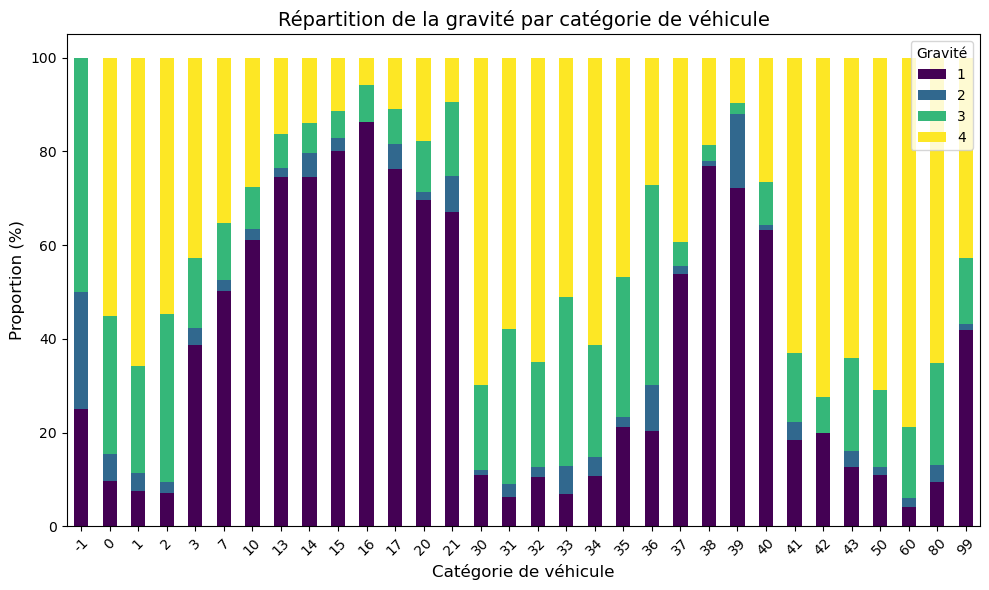

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Tableau croisé pour proportions par catégorie de véhicule
catv_crosstab = pd.crosstab(data['catv'], data['grav'], normalize='index') * 100

# Affichage du tableau croisé
print("Tableau croisé : Catégorie de véhicule vs Gravité (en %)\n", catv_crosstab)

# Diagramme en barres empilées
catv_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Répartition de la gravité par catégorie de véhicule", fontsize=14)
plt.xlabel("Catégorie de véhicule", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.legend(title="Gravité", loc="upper right", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Le diagramme présente la répartition de la gravité des accidents selon la catégorie de véhicule. Les barres verticales montrent les proportions d'accidents pour chaque gravité (1 à 4) dans différentes catégories de véhicules, représentées par leurs numéros. La gravité 1 (en violet) domine dans la plupart des catégories, mais certaines catégories, comme celles associées aux numéros 3, 35 et 37, affichent une proportion notable d'accidents graves (gravités 3 et 4, en jaune et vert). D'autres catégories, comme 1, 2 et 99, semblent concentrées exclusivement sur les accidents les moins graves. On en deduit les types de véhicules influencent significativement la gravité des accidents, ce qui suggère une nécessité d'adapter les mesures de sécurité routière en fonction des véhicules impliqués.

grav           1         2          3          4
sexe                                            
-1    100.000000  0.000000   0.000000   0.000000
 1     43.313416  3.154555  16.131764  37.400265
 2     37.099275  1.914326  14.605313  46.381086


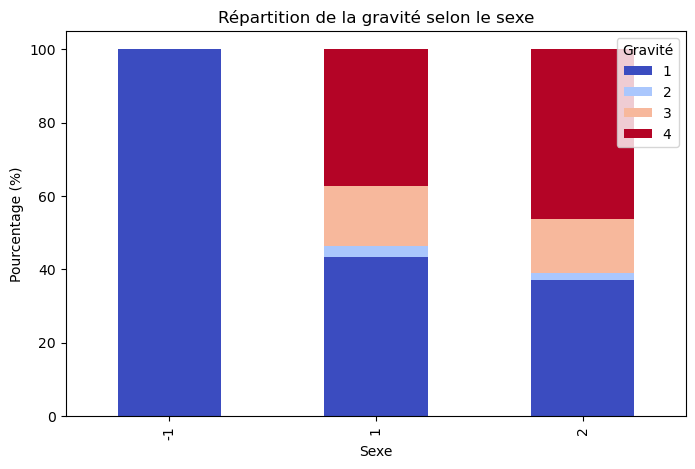

In [14]:
# Exemple avec sexe
gravite_sexe = pd.crosstab(data['sexe'], data['grav'], normalize='index') * 100
print(gravite_sexe)

gravite_sexe.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Répartition de la gravité selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Gravité")
plt.show()
plt.close()



Ce graphique illustre la répartition de la gravité des accidents selon le sexe des individus impliqués. Les barres représentent les pourcentages d'accidents par gravité, répartis entre trois catégories de sexe : -1 (non précisé), 1 (hommes) et 2 (femmes). La catégorie non précisée (-1) ne comporte que des accidents de gravité minimale (1), tandis que les hommes et les femmes montrent une répartition similaire, avec une majorité d'accidents de gravité 1, suivis par des cas moins fréquents de gravité 3 et 4. Les femmes et les hommes ont des proportions comparables dans les accidents graves (gravité 3 et 4), bien que la différence puisse être explorée statistiquement pour confirmer l'égalité. Le sexe ne semble pas introduire de disparité majeure dans la gravité des accidents.

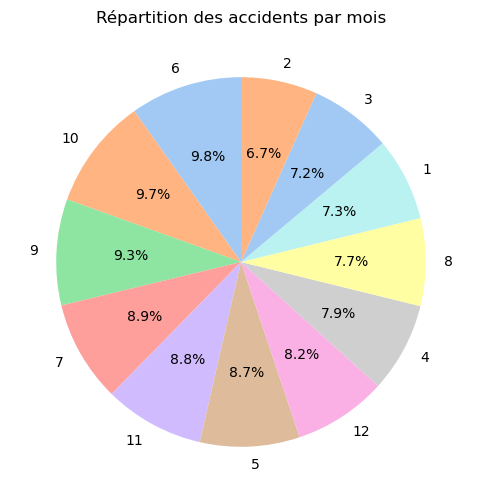

In [16]:
data['mois'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 6), colors=sns.color_palette("pastel"))
plt.title("Répartition des accidents par mois")
plt.ylabel("")  # Supprime l'étiquette inutile
plt.show()


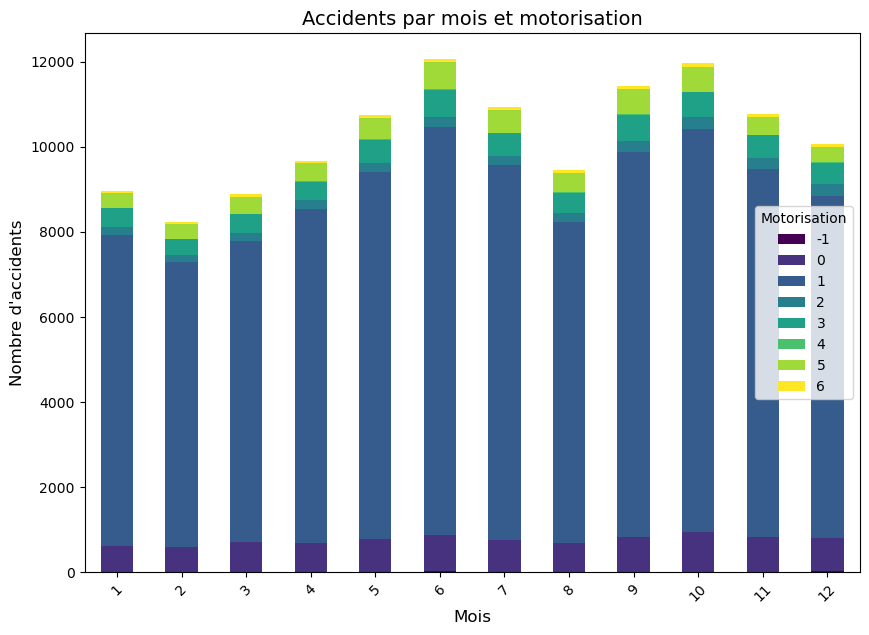

In [17]:
data_grouped = data.groupby(['mois', 'motor']).size().unstack()
data_grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title("Accidents par mois et motorisation", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Nombre d'accidents", fontsize=12)
plt.legend(title="Motorisation")
plt.xticks(rotation=45)
plt.show()


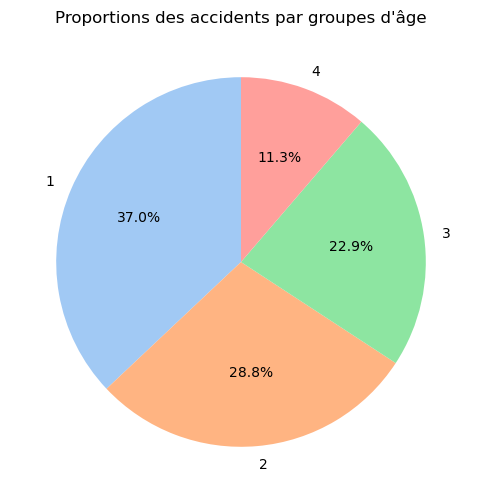

In [18]:
data['age_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 6), colors=sns.color_palette("pastel"))
plt.title("Proportions des accidents par groupes d'âge")
plt.ylabel("")  # Supprime l'étiquette inutile
plt.show()



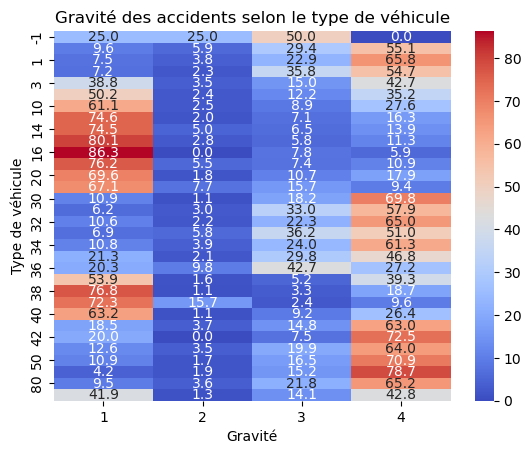

In [19]:
heatmap_data = pd.crosstab(data['catv'], data['grav'], normalize='index') * 100
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Gravité des accidents selon le type de véhicule")
plt.xlabel("Gravité")
plt.ylabel("Type de véhicule")
plt.show()
